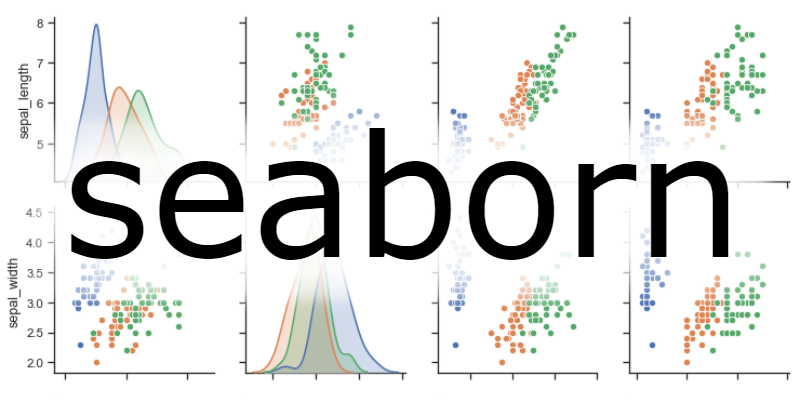

- [**Exploratory Data Analysis with Seaborn**](#Exploratory-Data-Analysis-with-Seaborn)
- [**Tipos de las variables**](#Tipos-de-las-variables)
    - [**1. Analisis univariante**](#1.-Análisis-univariante)
        - [**1.1 Variables cuantitativas**](#1.1-Variables-cuantitativas)
        - [**1.2 Variables cualitativas**](#1.2-Variables-cualitativas)
    - [**2. Analisis Bivariante**](#2.-Análisis-Bivariante)
        - [**2.1 Comparativa de variables cuantitativas**](#2.1-Comparativa-de-variables-cuantitativas-(2-4-variables))
        - [**2.2 Comparativa de múltiples numéricas**](#2.2-Comparativa-de-múltiples-numéricas)
        - [**2.3 Comparativa de dos variables cualitativas**](#2.3-Comparativa-de-dos-variables-cualitativas)
        - [**2.4 Cualitativa vs cuantitativa**](#2.4-Cualitativa-vs-cuantitativa)

### Enlaces de interés:
- [¿Cómo interpretar un boxplot?](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [¿Cómo puedo usar Matplotlib object oriented interface con Seaborn?](https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface)
- [¿Por qué en la gráfica de la función de densidad a veces incluye valores negativos?](https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables)

[**Seaborn**](https://seaborn.pydata.org/) es una librería de visualización de datos de Python basada en matplotlib. Esta nos permite hacer interfaces de alto nivel con gráficas atractivas pero también estadísticamente informativas. 

# Exploratory Data Analysis with Seaborn (y más Matplotlib)
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numércias y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [5]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set_theme con color_codes a True nos permite simplificar 
# los nombres de los colores: r es red, g es green...
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [6]:
iris_df = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
iris_df['target']=load_iris()['target_names'][load_iris()['target']]

boston_df = pd.read_csv('data/BostonHousing.csv')

titanic_df = pd.read_csv('data/titanic.csv')

market_df = pd.read_csv('data/supermarket_sales.csv')

suicid_df = pd.read_csv('data/suicide.csv')


In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

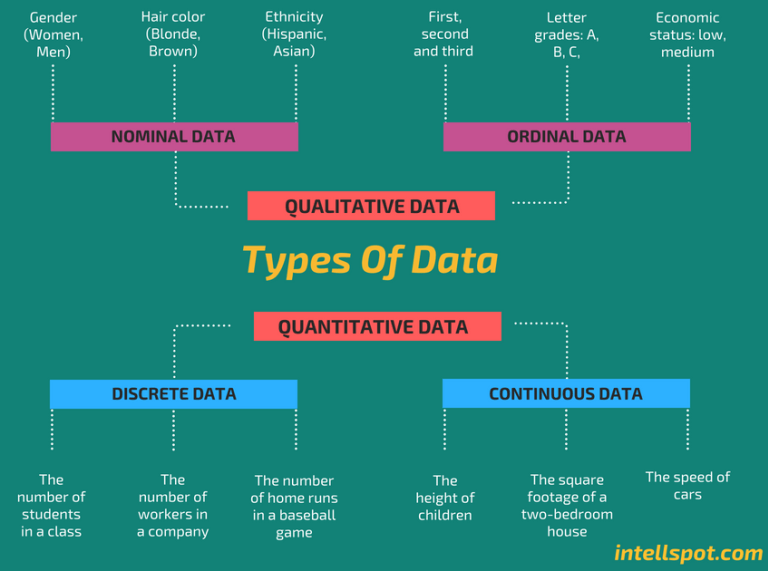

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Histograma y Densidad

[Histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html)

[Densidad](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad. 

La diferencia es que en el histograma el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

<Axes: xlabel='Fare', ylabel='Count'>

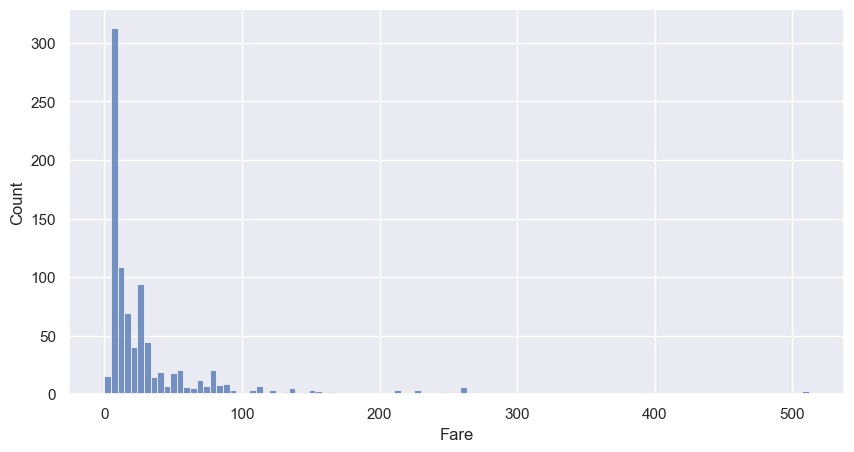

In [10]:
plt.figure(figsize=(10,5))

sns.histplot(titanic_df['Fare'])


<Axes: xlabel='Fare', ylabel='Count'>

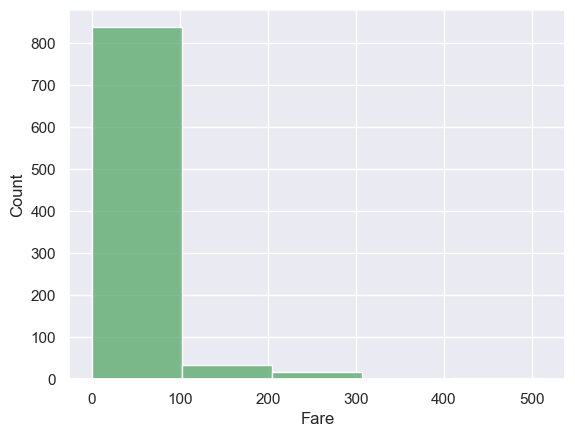

In [11]:
# Ver documentación para aprovechar todas las posibilidades
sns.histplot(titanic_df['Fare'], bins=5, color="g")


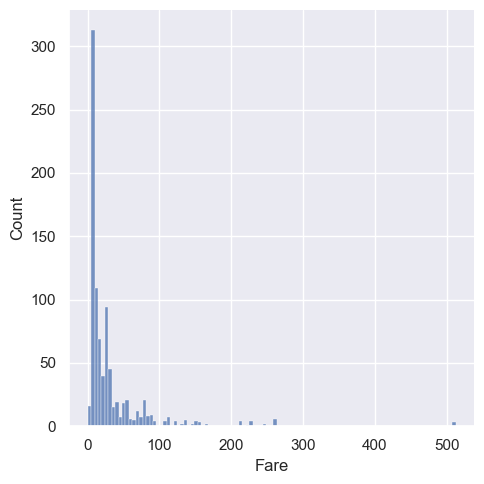

In [12]:
# Similar, ver documentación
# https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(titanic_df['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

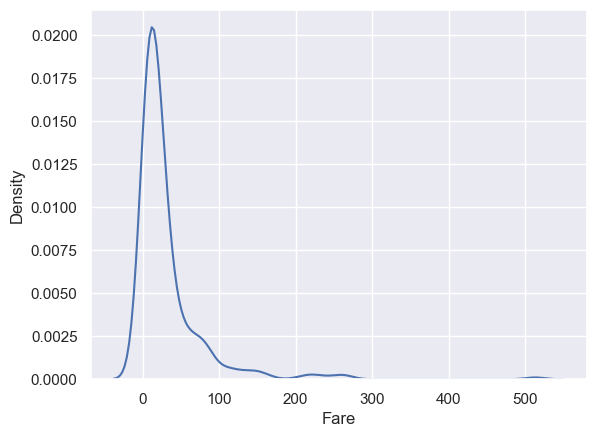

In [13]:
# Se puede tomar como variable continua y elaborar el gráfico de densidad
# Suma 1 a lo largo de todo el eje X
sns.kdeplot(titanic_df['Fare'])

#### Histograma + Densidad

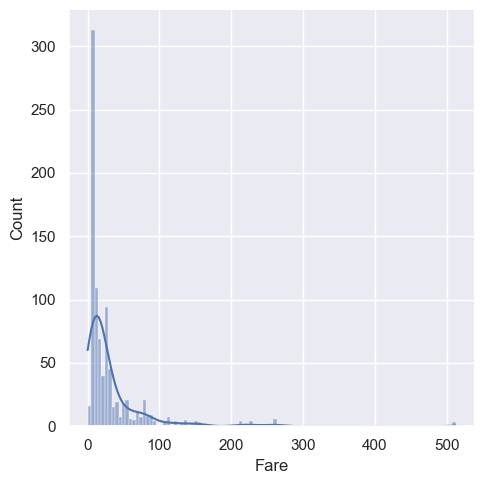

In [14]:
# Cuidado con convertir histográmas en densidades porque puede engañar
# Fare es discreta, al hacerla continua para la densidad pueden suceder desfases
sns.displot(data=titanic_df, x="Fare", kde=True)


#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

<Axes: xlabel='Fare'>

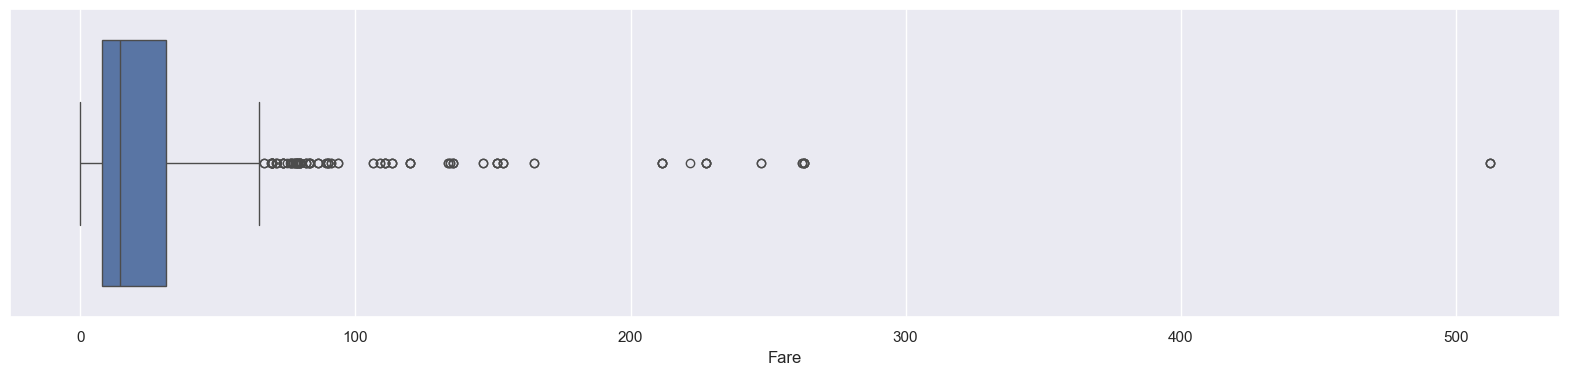

In [15]:
plt.figure(figsize=(20,4))
sns.boxplot(titanic_df['Fare'], orient='h')

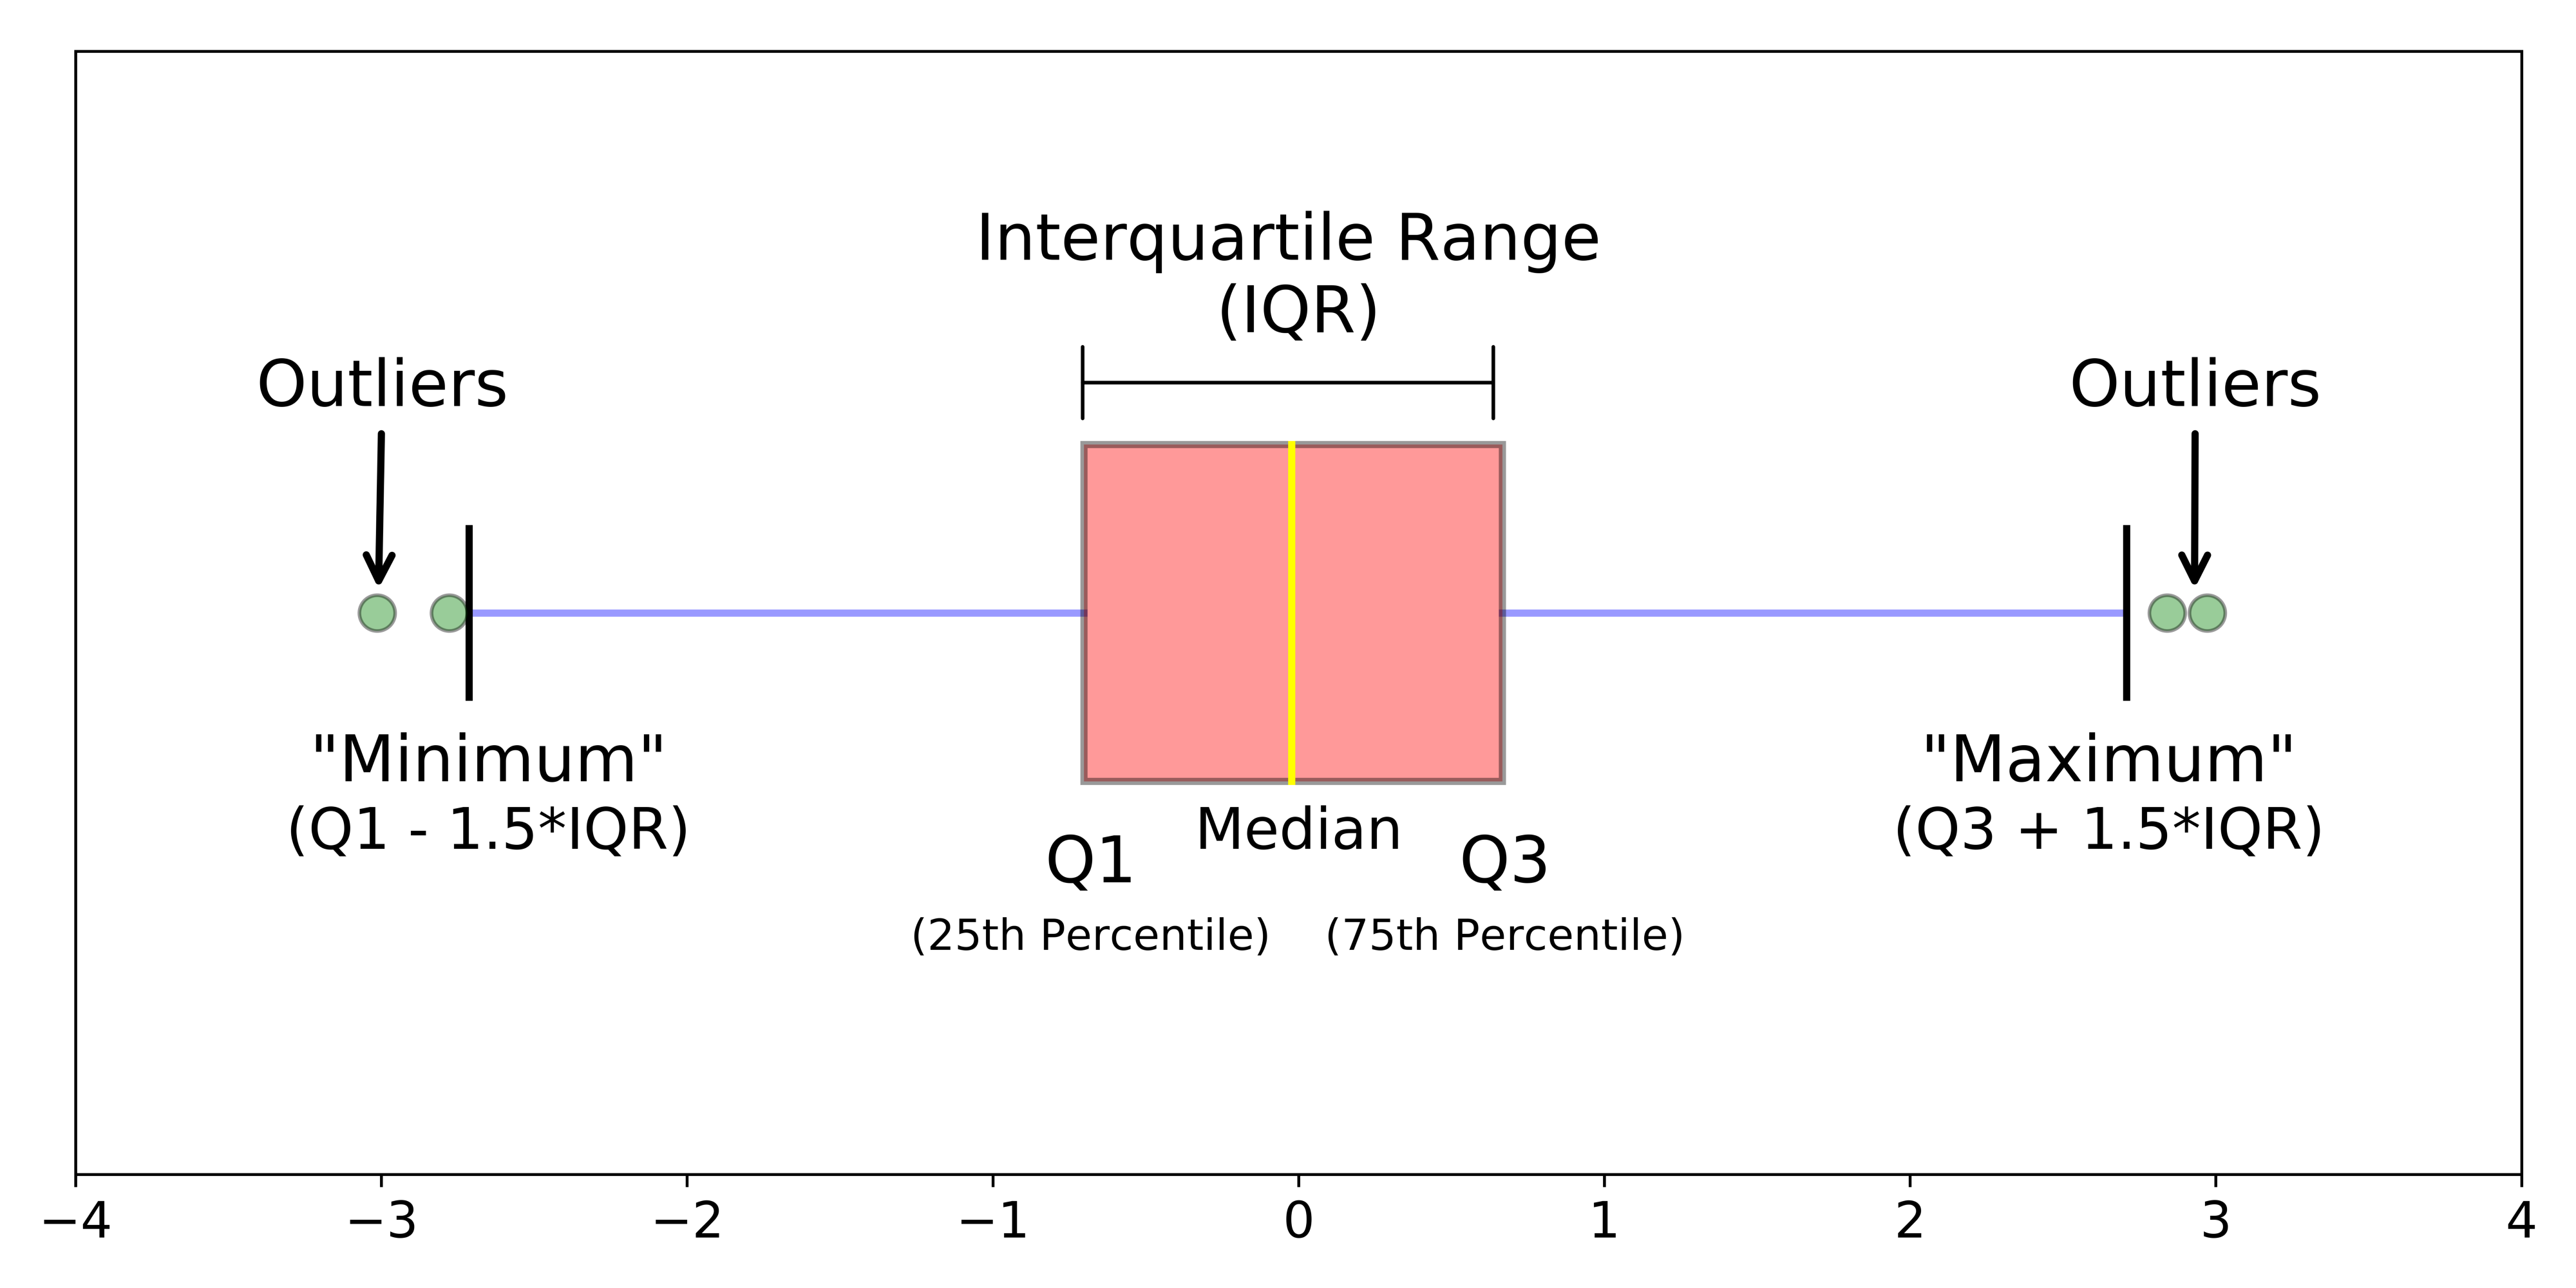

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

<Axes: ylabel='Fare'>

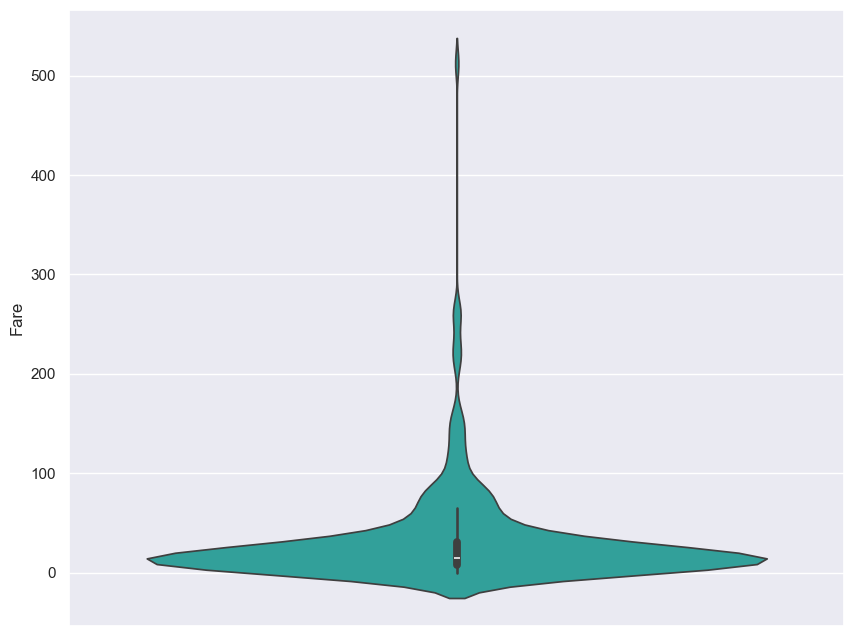

In [16]:
plt.figure(figsize=(10,8))
sns.violinplot(titanic_df['Fare'], color = 'lightseagreen')

<Axes: xlabel='Fare'>

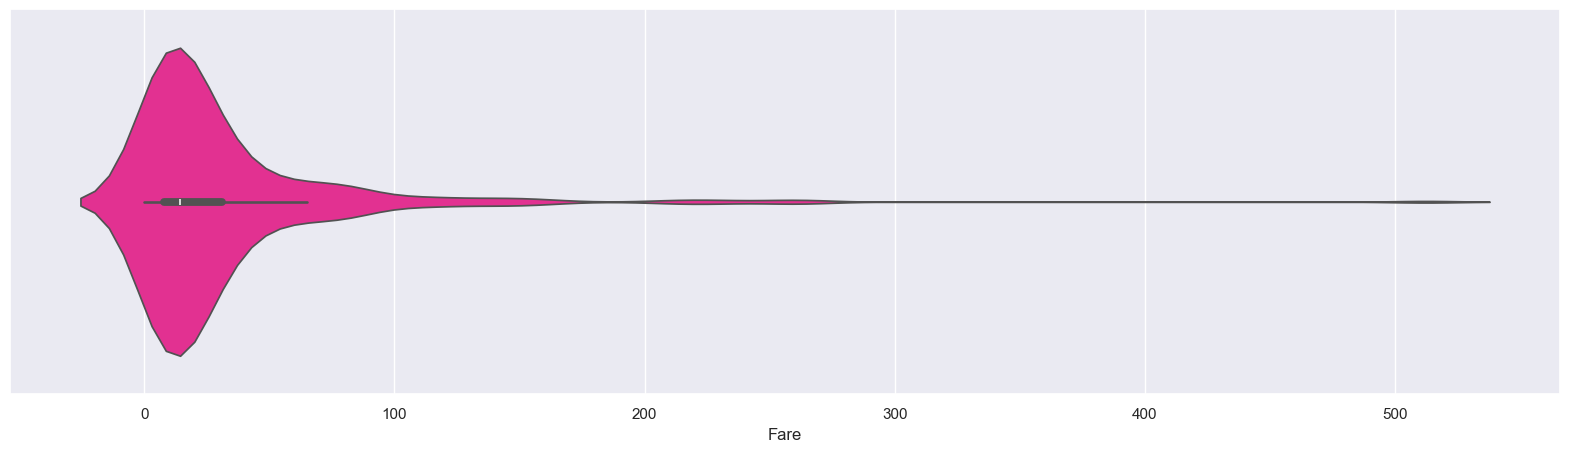

In [17]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df.Fare, color='deeppink', orient='h')

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [18]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

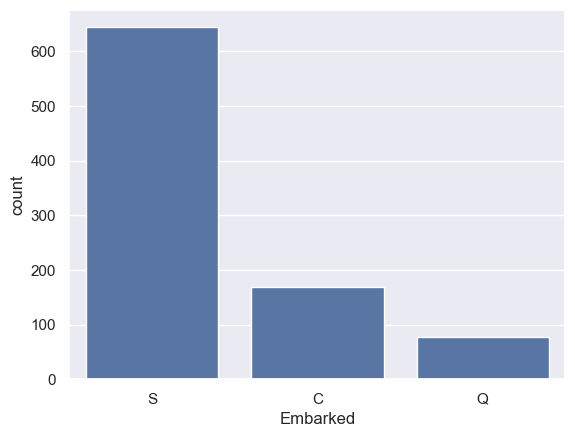

In [19]:
plt.figure()
sns.countplot(x='Embarked', data=titanic_df)

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [20]:
conteo = market_df['Product line'].value_counts()
conteo

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

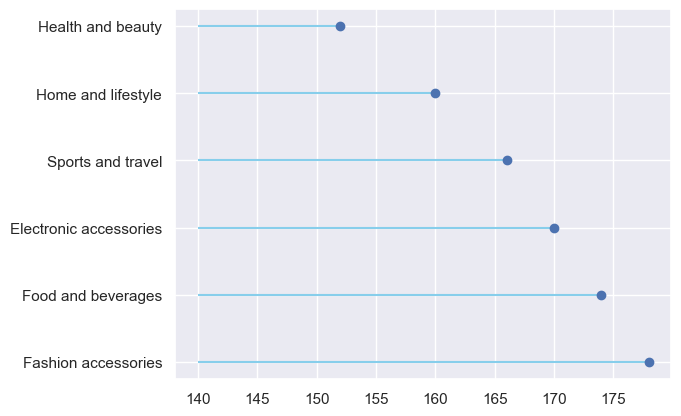

In [21]:
plt.figure()
plt.hlines(y=conteo.index,
          xmin=140,xmax=conteo, 
          color='skyblue')
plt.plot(conteo, conteo.index, 'o')

#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

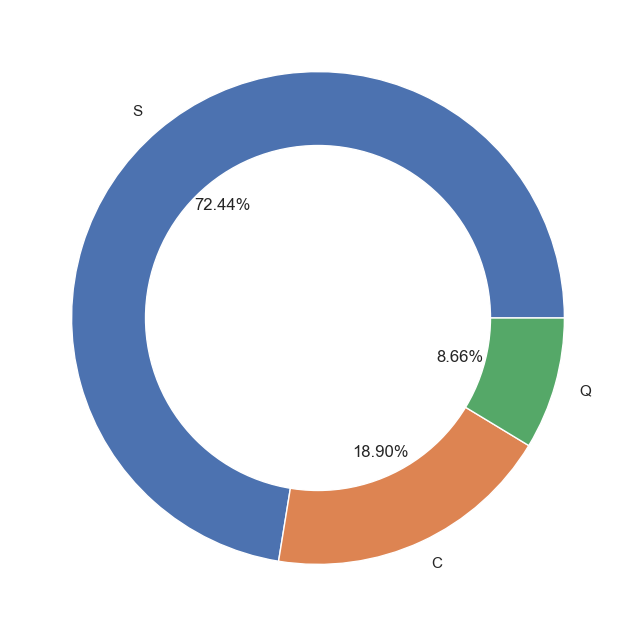

In [22]:
data = titanic_df['Embarked'].value_counts()

circle = plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8,8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')

p = plt.gcf() # hace referencia a la figura activa
p.gca().add_artist(circle)

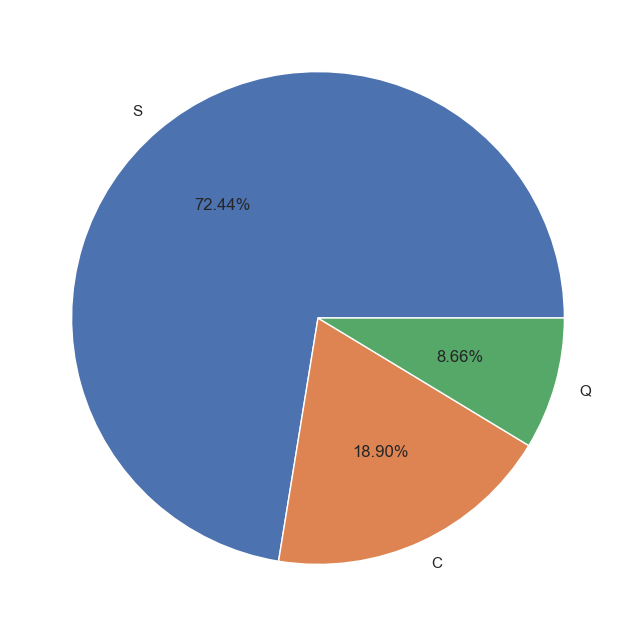

In [23]:
# pie chart
plt.figure(figsize = (8,8))
plt.pie(data.values,
       labels = data.index,
       autopct='%1.2f%%');

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

<Axes: >

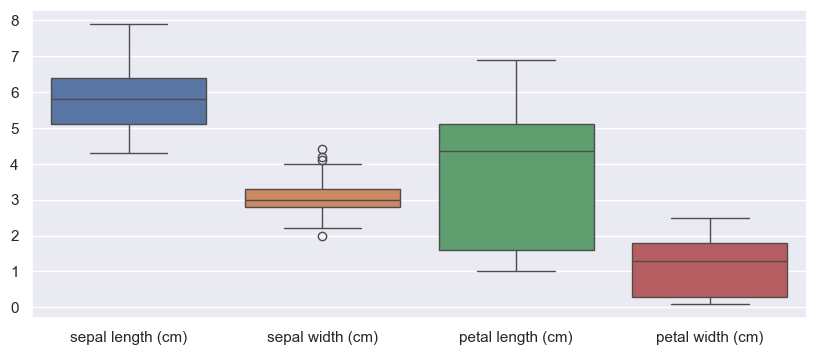

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data=iris_df.iloc[:,0:4])

El boxplot está bien, pero hay algo de información que se nos escapa

<Axes: >

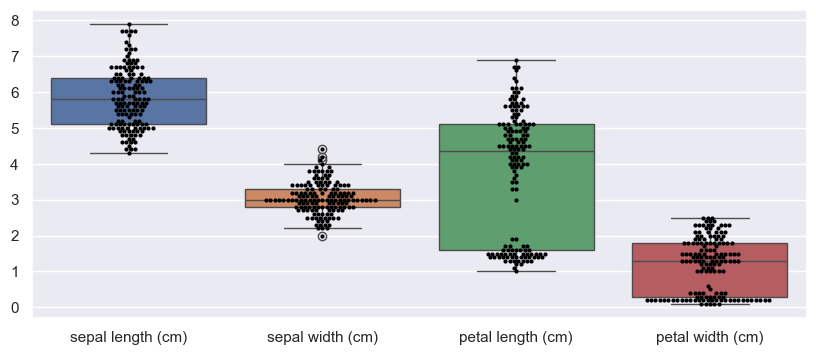

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(data=iris_df.iloc[:,0:4])
sns.swarmplot(data=iris_df.iloc[:,0:4],color='black',s=3)

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

<Axes: ylabel='Density'>

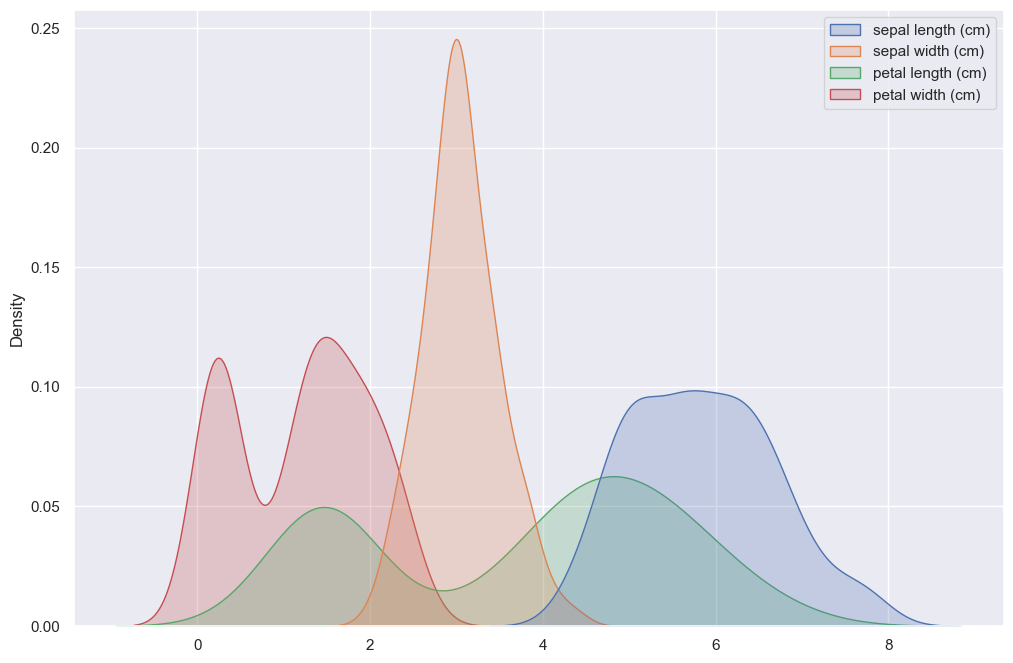

In [26]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df.iloc[:,0:4],shade=True)

#### Histogramas


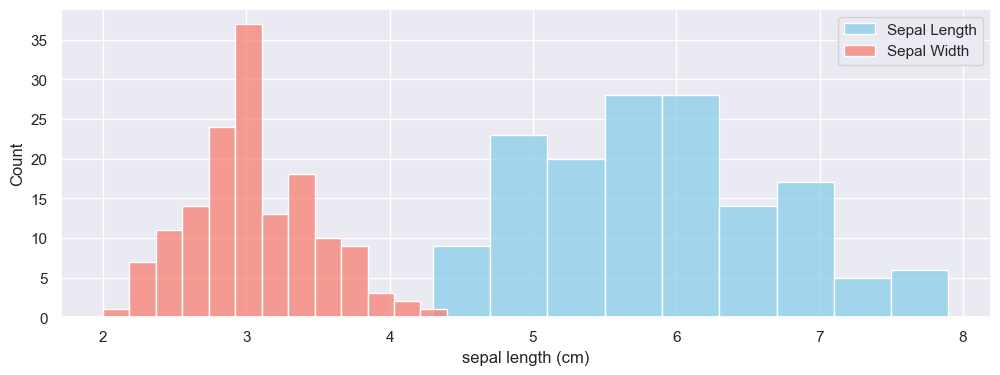

In [27]:
plt.figure(figsize=(12,4))
sns.histplot(iris_df['sepal length (cm)'],color='skyblue', label='Sepal Length')
sns.histplot(iris_df['sepal width (cm)'], color='salmon', label='Sepal Width')
plt.legend()

In [28]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

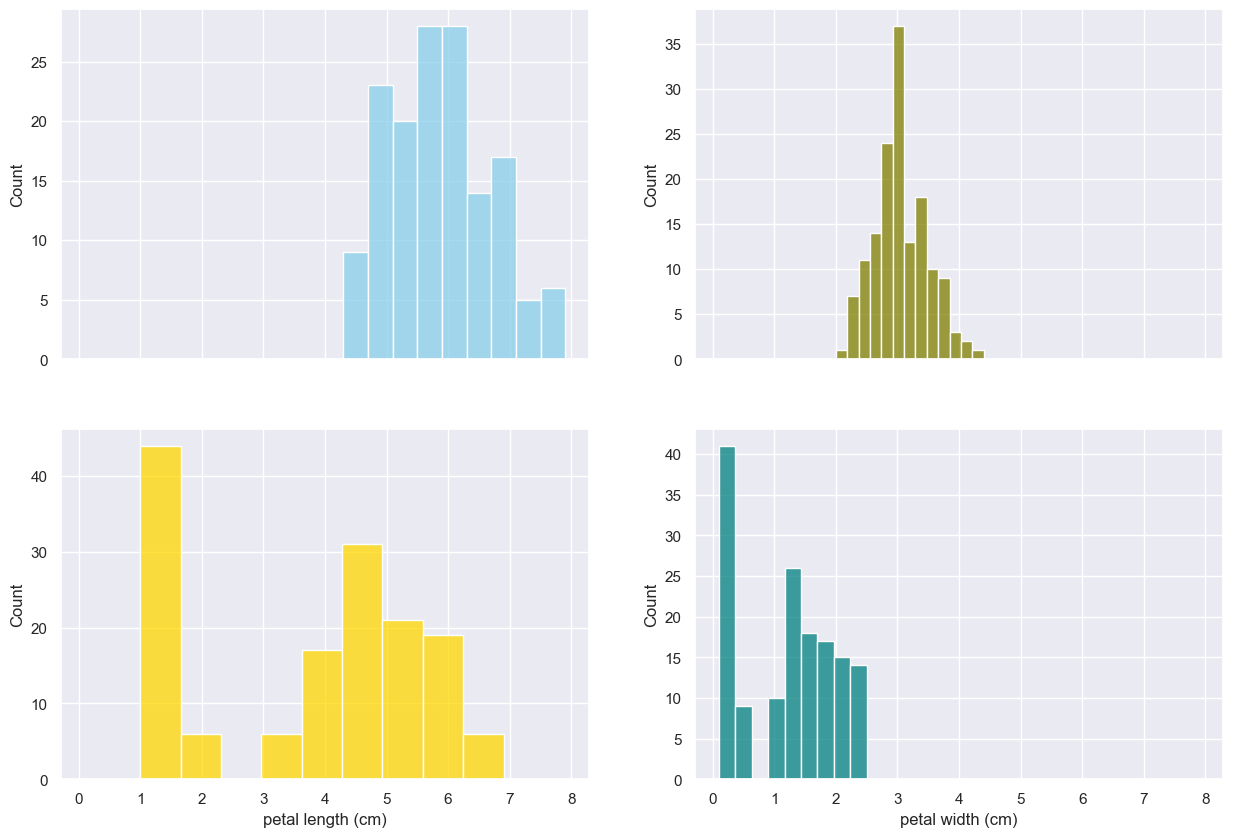

In [29]:
f,ax = plt.subplots(2,2,figsize=(15,10),sharex=True)
sns.histplot(iris_df['sepal length (cm)'],color='skyblue',ax=ax[0,0])
sns.histplot(iris_df['sepal width (cm)'],color='olive',ax=ax[0,1])
sns.histplot(iris_df['petal length (cm)'],color='gold',ax=ax[1,0])
sns.histplot(iris_df['petal width (cm)'],color='teal',ax=ax[1,1]);


#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [30]:
iris_df['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

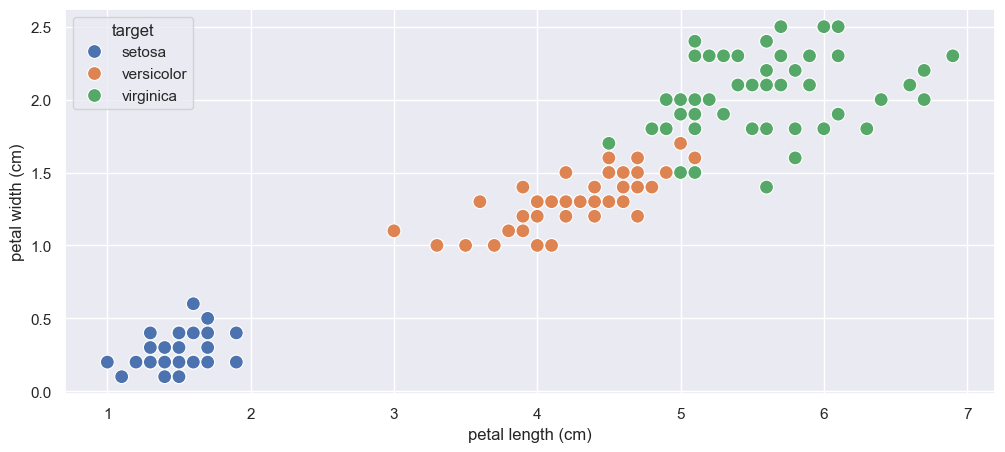

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=iris_df['petal length (cm)'],
                y=iris_df['petal width (cm)'],
               hue=iris_df['target'], s=100);

[Documentación dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

In [33]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


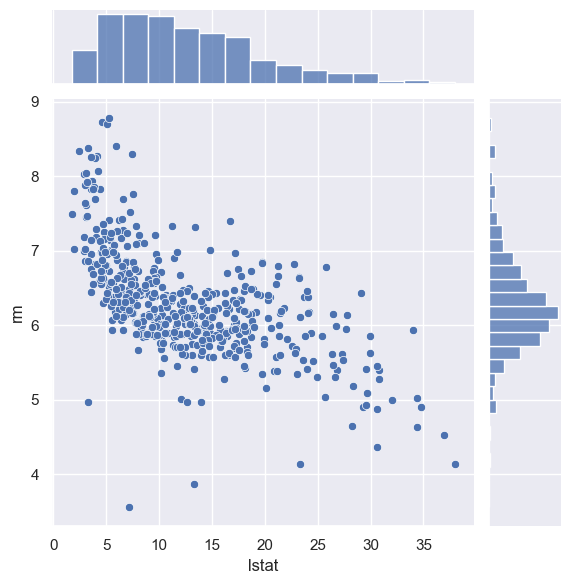

In [34]:
sns.jointplot(x = boston_df['lstat'], y = boston_df['rm'])

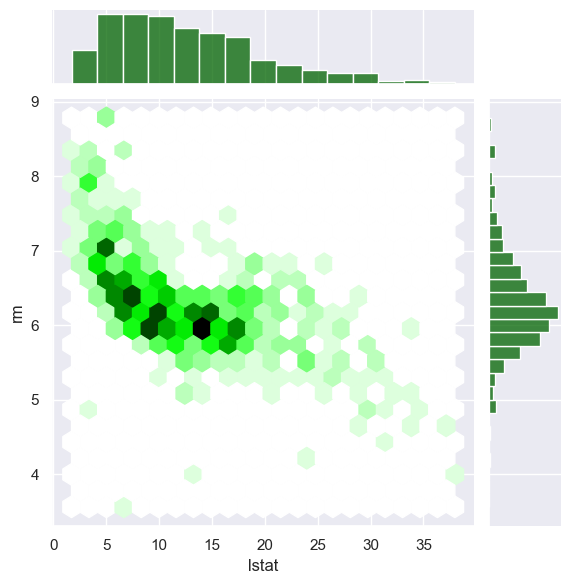

In [35]:
sns.jointplot(x = boston_df['lstat'], y = boston_df['rm'],
             color='darkgreen', kind='hex')

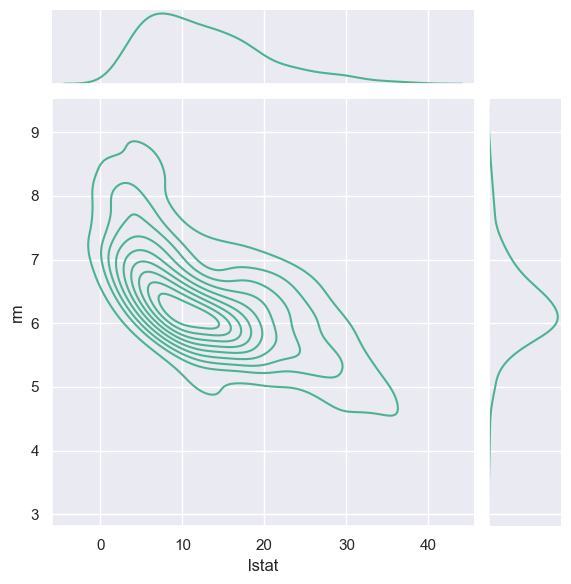

In [36]:
sns.jointplot(x = boston_df['lstat'],
             y = boston_df['rm'],
            kind = 'kde',
             color = '#4CB391')

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [37]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


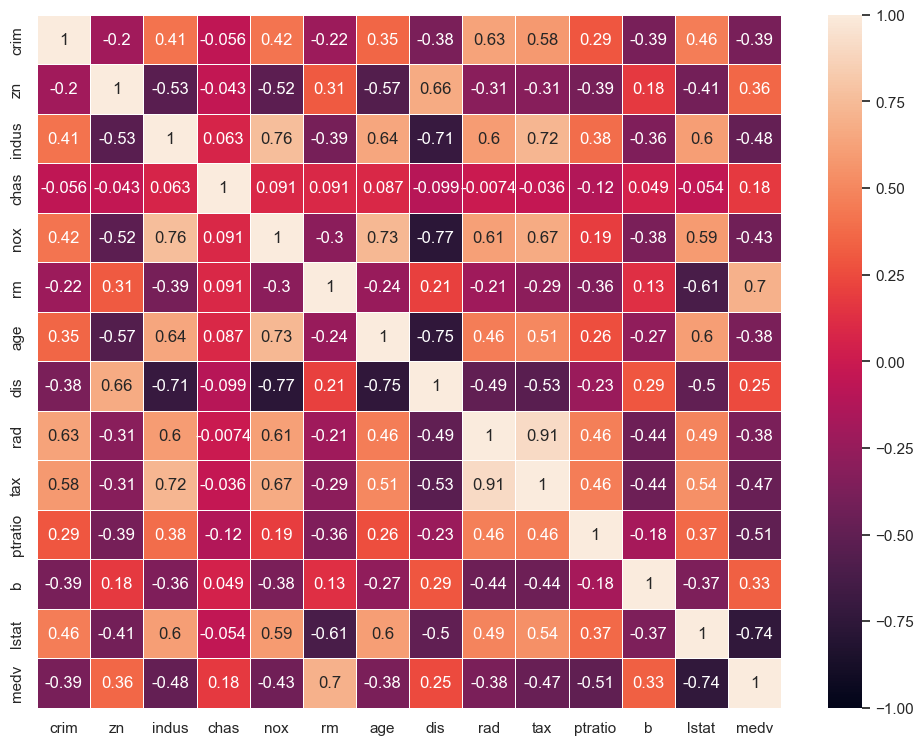

In [38]:
plt.figure(figsize=(12,9))
sns.heatmap(boston_df.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5);

<Axes: >

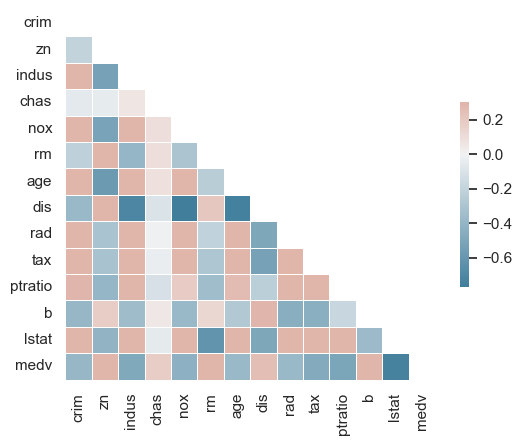

In [39]:
sns.set_theme(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Matrix triangular: para evitar repetir combinaciones de correlaciones
mask = np.triu(np.ones_like(boston_df.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(boston_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [40]:
# dos categoricas una numerica
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data_filtrado = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]
data_filtrado

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


<Axes: xlabel='age', ylabel='country'>

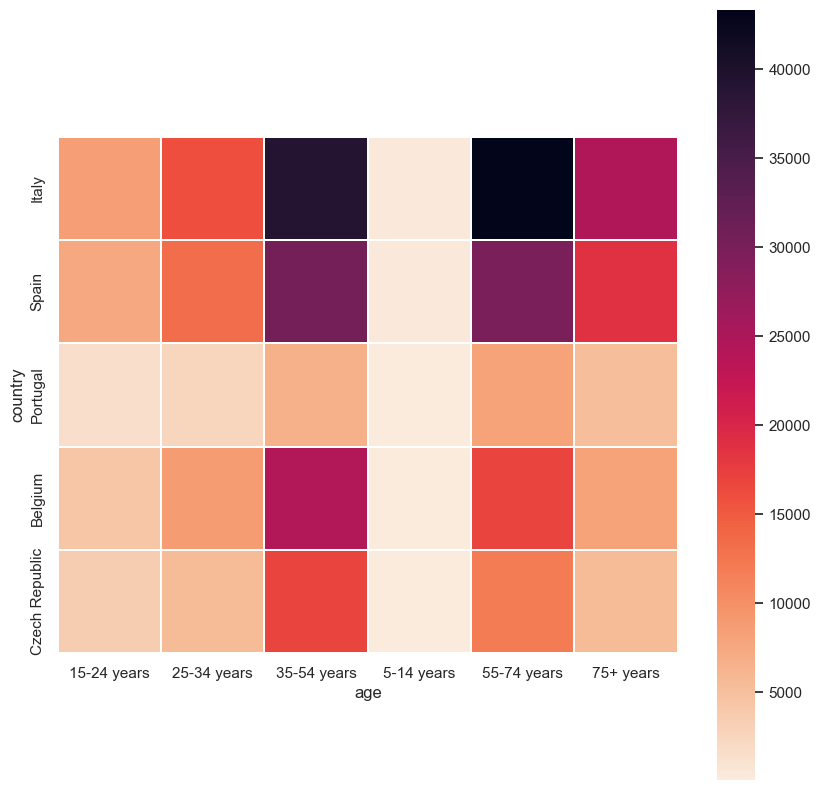

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data_filtrado, square = True, linewidths = .3, cmap = sns.cm.rocket_r)

In [42]:
suicid_df.loc[suicid_df['age']=="5-14 years", 'age'] = '05-14 years'
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data_filtrado = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]
data_filtrado

age,05-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
country,,,,,,
Italy,400.0,8571.0,16115.0,39250.0,43314.0,24410.0
Spain,354.0,7559.0,13373.0,30331.0,29807.0,18778.0
Portugal,85.0,1505.0,2590.0,6535.0,8189.0,5157.0
Belgium,216.0,4475.0,8731.0,24300.0,16887.0,8152.0
Czech Republic,174.0,3596.0,5498.0,16885.0,12042.0,5492.0


<Axes: xlabel='age', ylabel='country'>

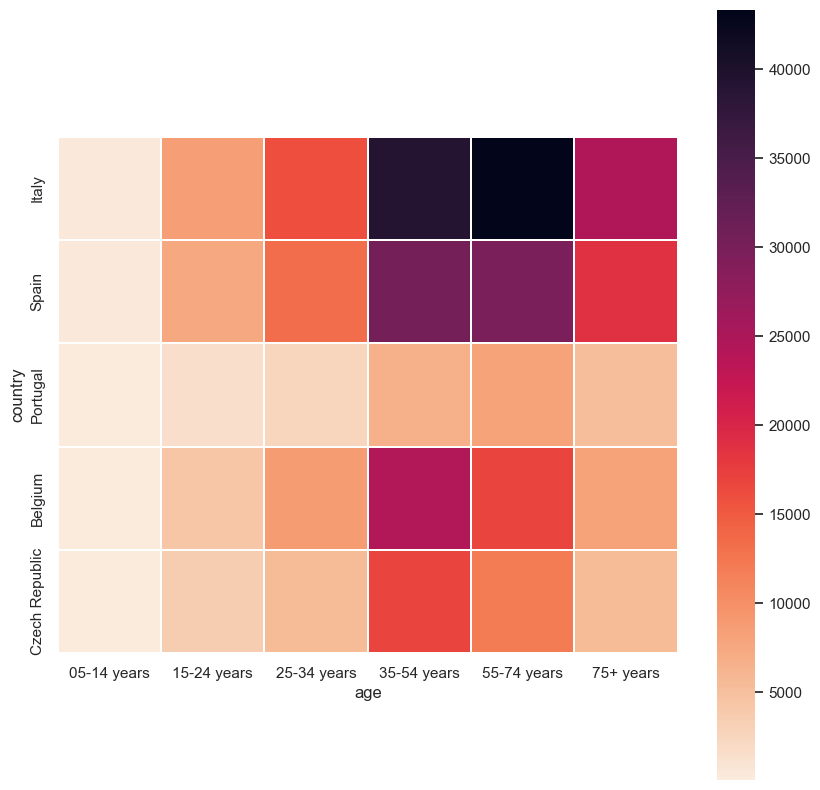

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data_filtrado, square = True, linewidths = .3, cmap = sns.cm.rocket_r)

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas variables porque no se va a ver bien.

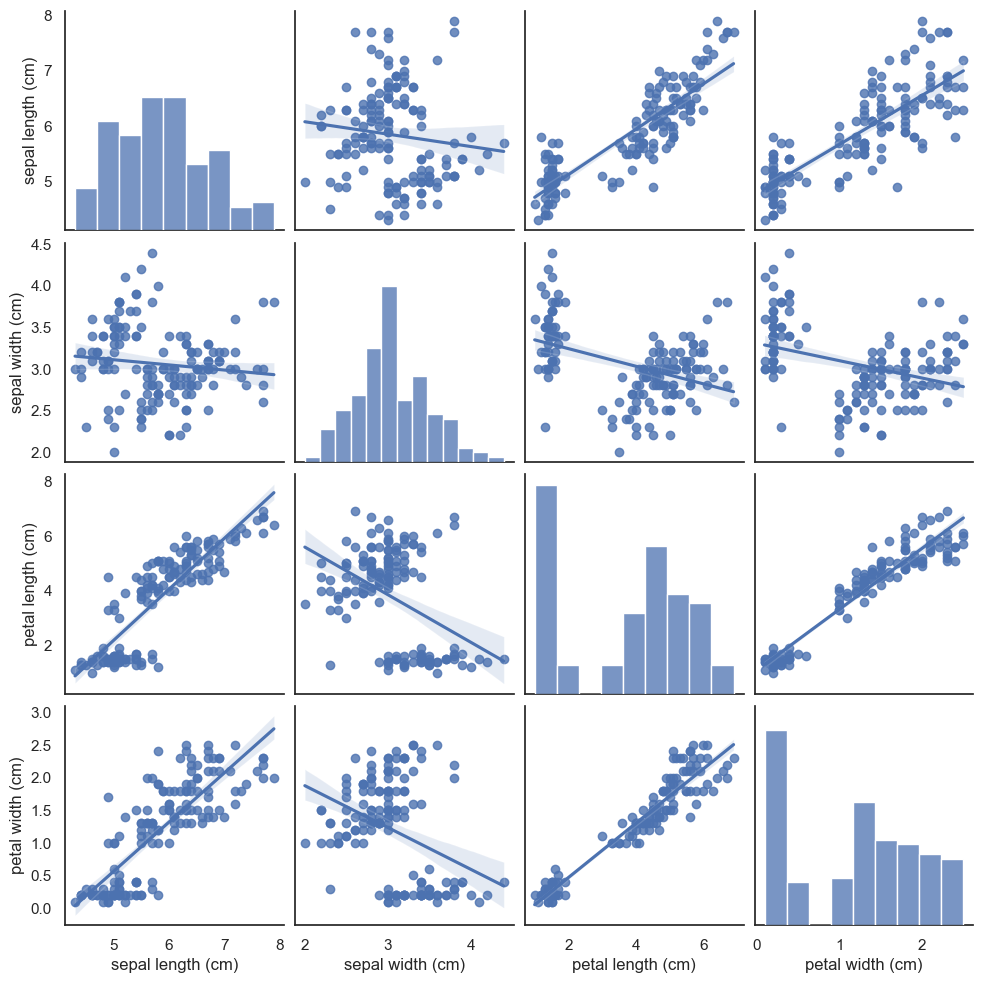

In [44]:
sns.pairplot(iris_df, kind='reg')

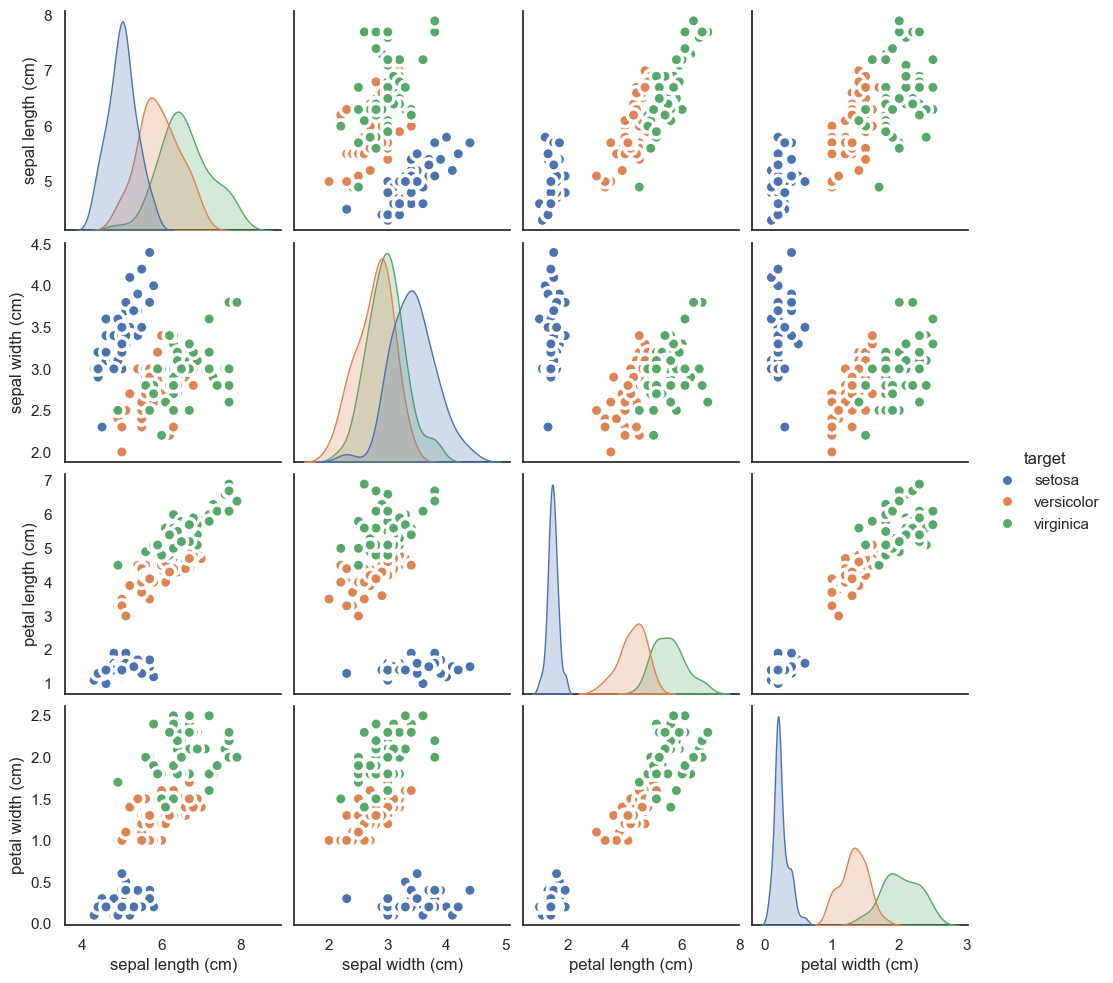

In [45]:
sns.pairplot(iris_df, kind='scatter', hue='target',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5))

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [46]:
pd.crosstab(titanic_df['Embarked'],titanic_df['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [47]:
# Es otra forma más simple de hacer pivot tables sencillas!
titanic_df.pivot_table(index='Embarked',values="PassengerId",columns='Sex' , aggfunc="count")

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

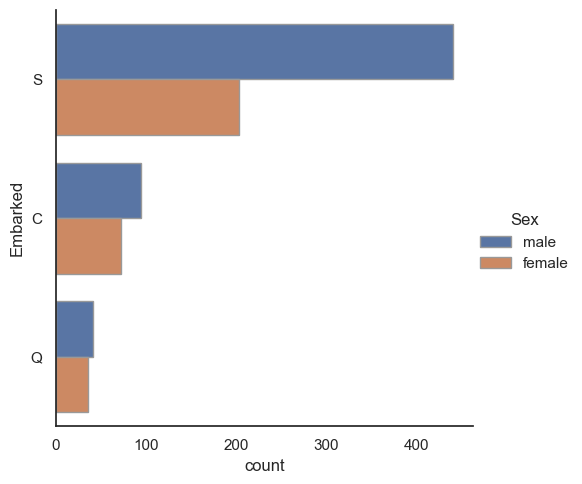

In [48]:
sns.catplot(y='Embarked',hue='Sex',kind='count',edgecolor='0.6',
            data=titanic_df)

Otra manera de visualizar dos o más variables categóricas

<Figure size 3000x1000 with 0 Axes>

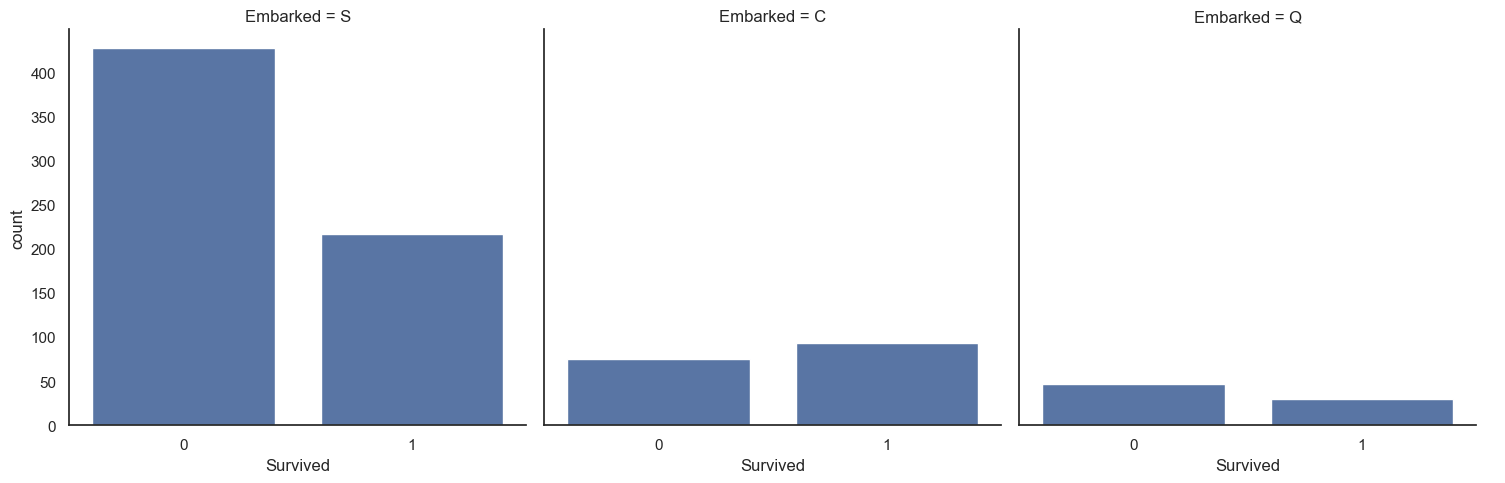

In [49]:
plt.figure(figsize=(30,10));
sns.catplot(x='Survived', 
           col = 'Embarked',
           data = titanic_df,
           kind = "count")

In [50]:
tab = pd.crosstab(titanic_df['Embarked'],titanic_df['Sex'])

<Axes: xlabel='Embarked'>

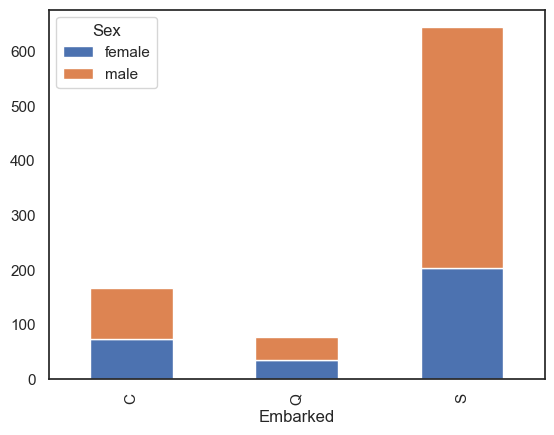

In [51]:
# Los objetos pandas también tienen pequeñas funcionalidades gráficas!
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
tab.plot(kind='bar',stacked=True)

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [52]:
suicid_df2 = suicid_df.loc[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year'])[['suicides_no', 'population', 'suicides/100k pop']].sum()
suicid_df2.reset_index(inplace=True)
suicid_df2

,country,year,suicides_no,population,suicides/100k pop
0,France,1985,12501,51382600,348.90
1,France,1986,12529,51637600,351.77
2,France,1987,12161,51900800,331.03
3,France,1988,11599,52157600,312.72
4,France,1989,11715,52417900,312.53
...,...,...,...,...,...
82,Spain,2011,3180,43642571,88.59
83,Spain,2012,3539,44318859,96.88
84,Spain,2013,3873,44227625,101.32
85,Spain,2014,3911,44172771,104.35


<Axes: xlabel='year', ylabel='suicides/100k pop'>

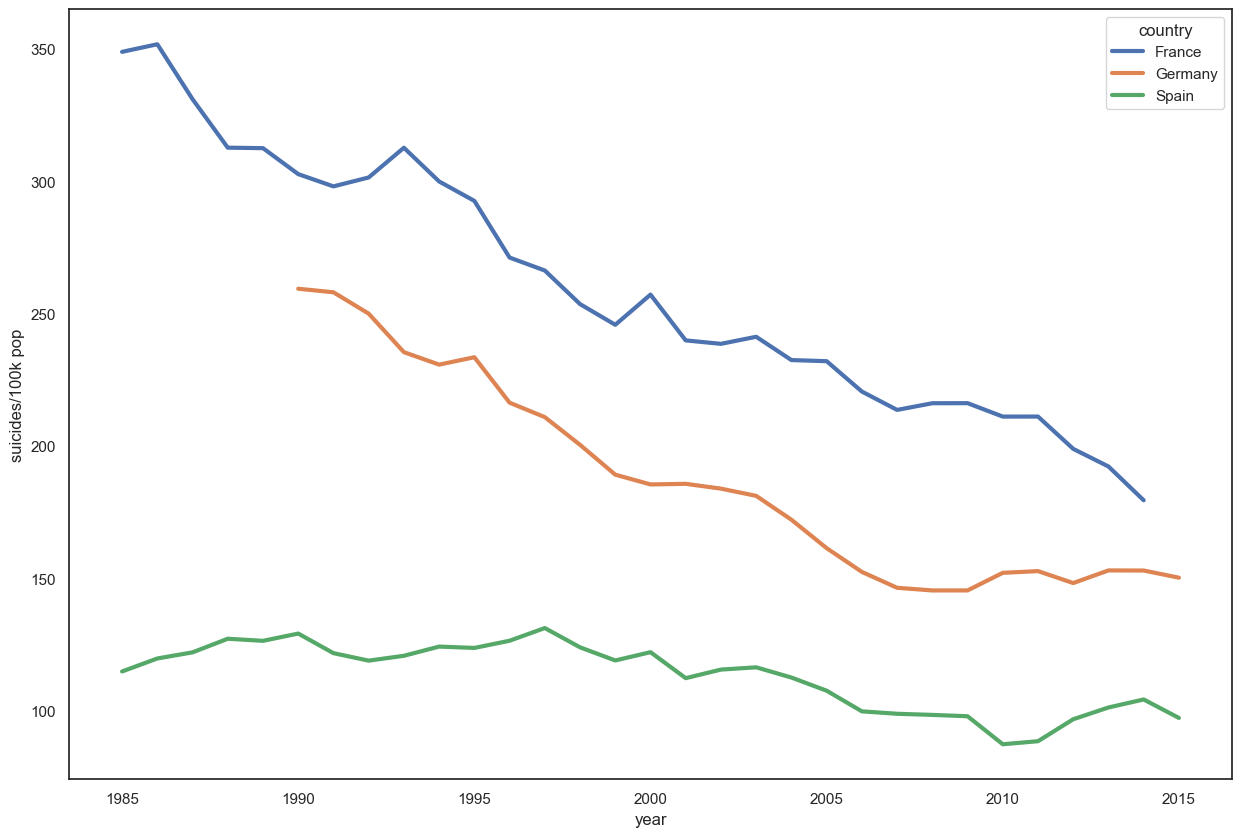

In [53]:
plt.figure(figsize=(15,10))
sns.lineplot(data = suicid_df2,
            x = 'year',
            y = 'suicides/100k pop',
            hue = 'country',
            linewidth = 3)

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [54]:
#hay que instalar la librería squarify

In [55]:
!pip install squarify

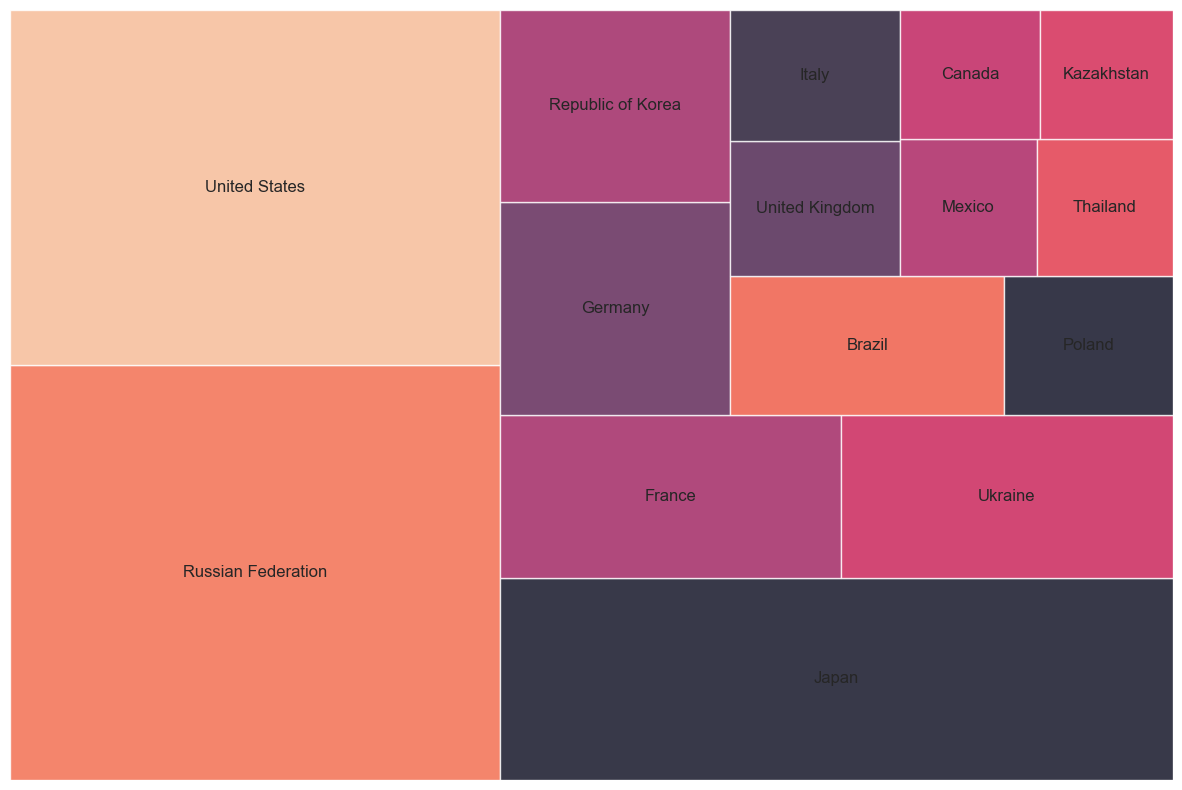

In [56]:
import squarify
plt.figure(figsize=(15,10))
data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:15]

squarify.plot(sizes=data.values,
             label=data.index,
             alpha=.8)
plt.axis('off')
plt.show()

**Bubblechart**

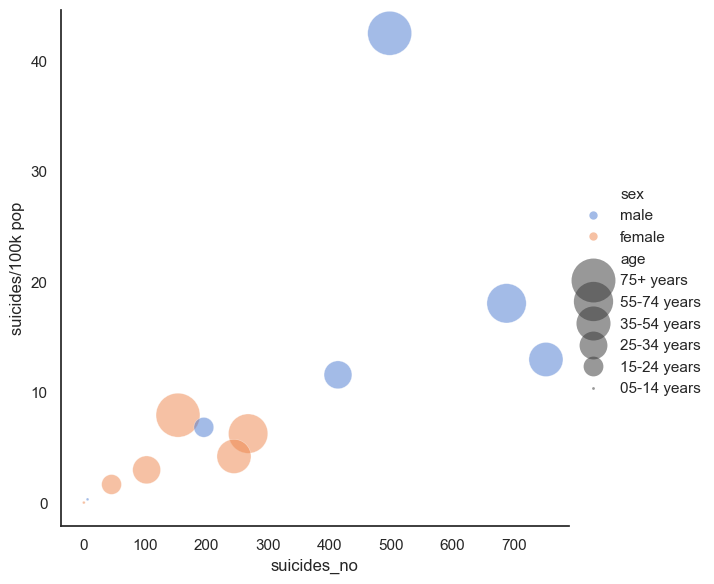

In [57]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 1000),
            alpha=.5, palette="muted",
            height=6);

**Hay multitud de opciones. Nadie sabe todas de memoria. Internet es la mejor fuente de inspiración**

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

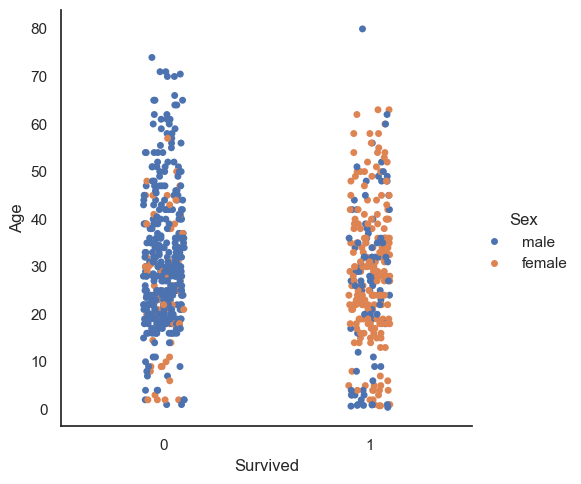

In [58]:
sns.catplot(x = 'Survived',
           y = 'Age',
           hue = 'Sex',
           data = titanic_df);

El equivalente con un diagrama de caja sería el siguiente

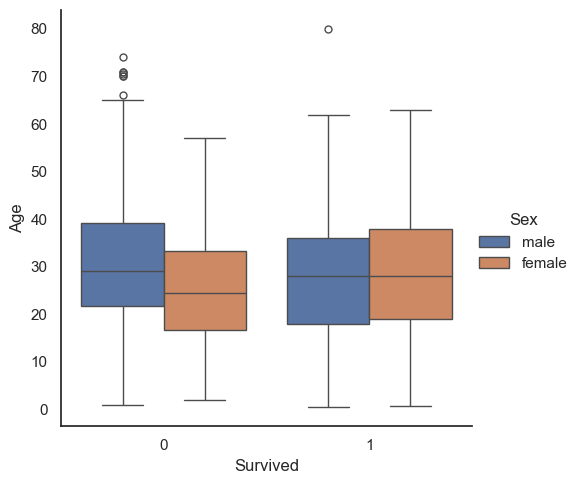

In [59]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

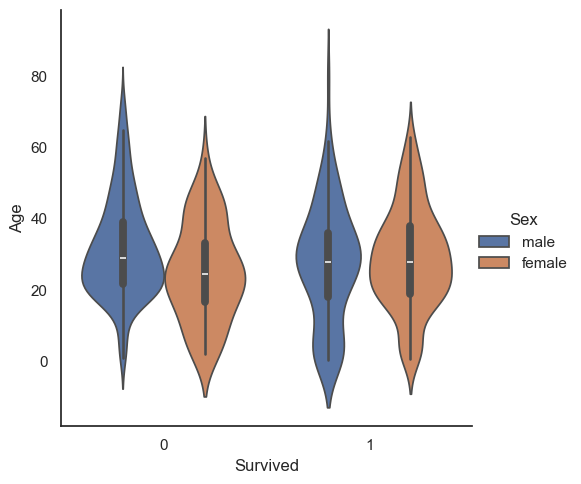

In [60]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

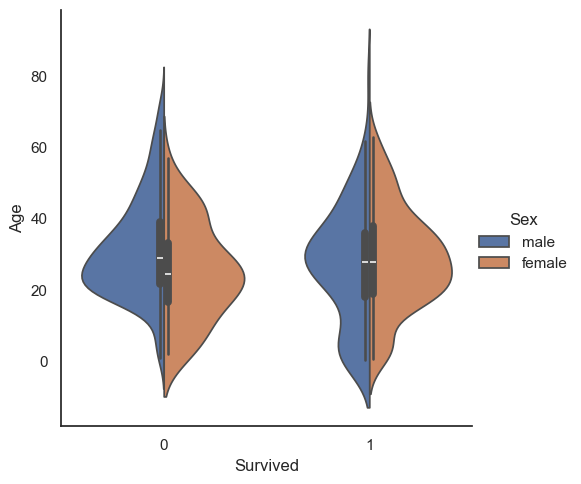

In [61]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split = True, data=titanic_df);

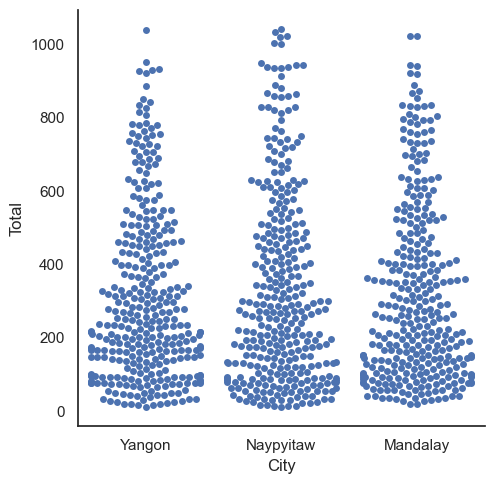

In [62]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

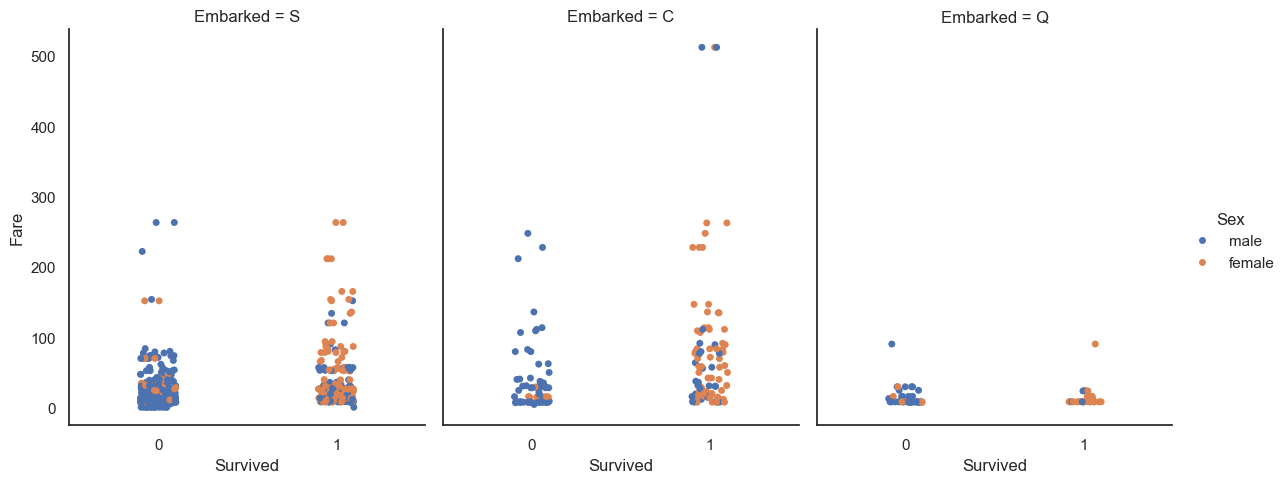

In [63]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

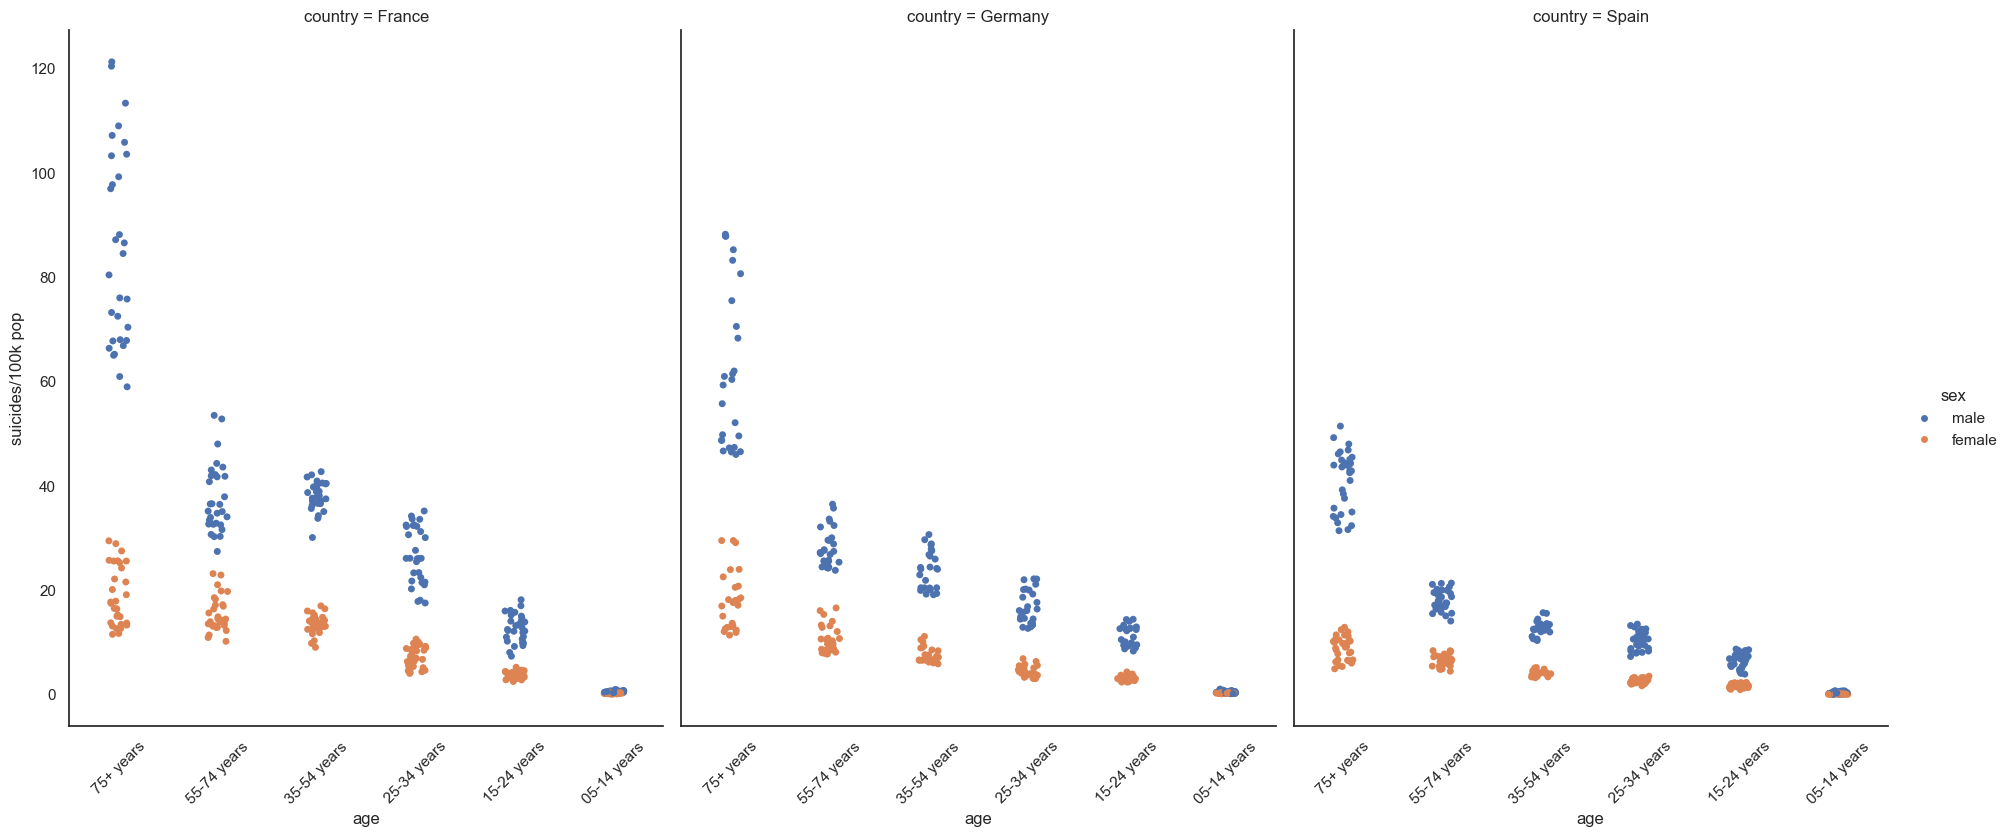

In [64]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x = 'age',
                   y = 'suicides/100k pop',
                   hue = 'sex',
                   col = 'country',
                   data = suicid_df2,
                   height = 8,
                   aspect = 0.8)

chart.set_xticklabels(rotation=45);

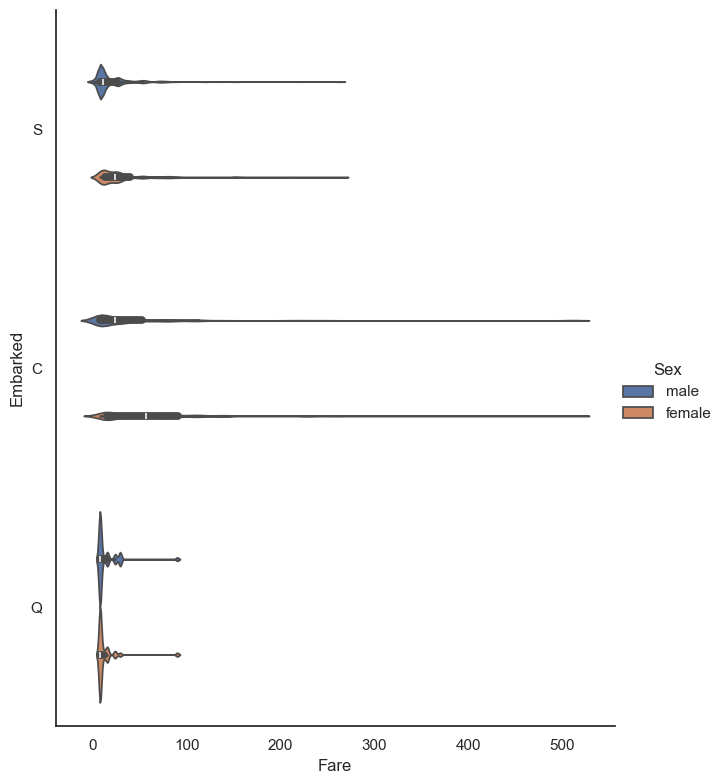

In [65]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

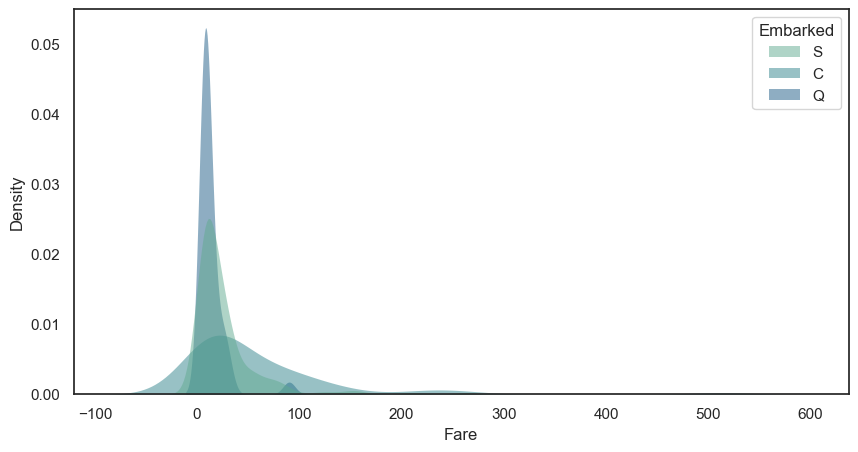

In [66]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

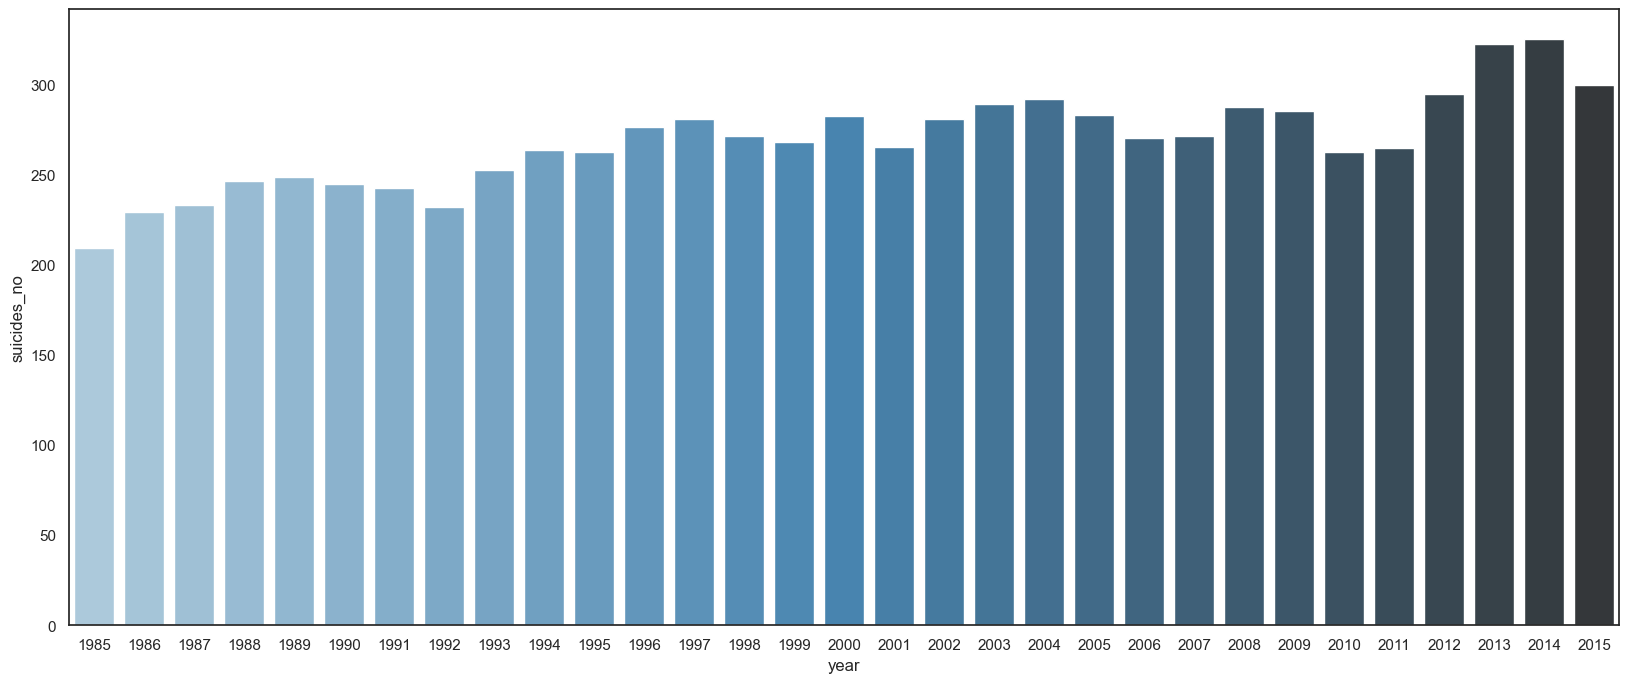

In [67]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x = 'year',
           y = 'suicides_no',
           palette = 'Blues_d',
           data = suicid_df2,
           ci = None);

In [68]:
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

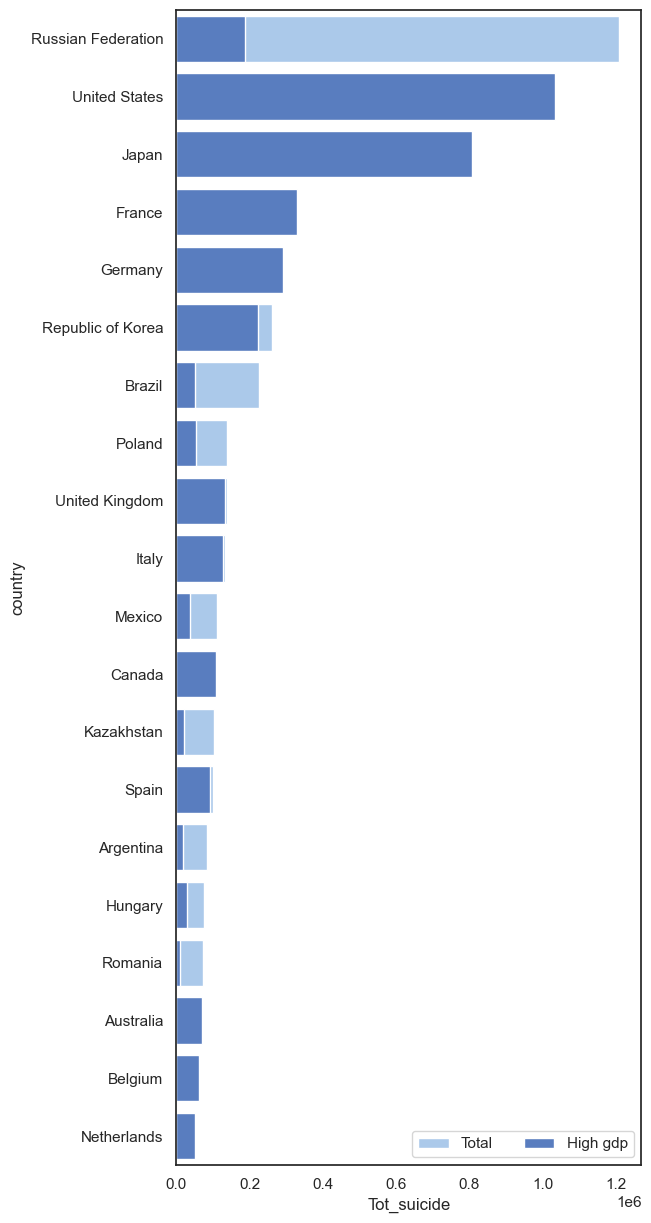

In [69]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right")
